In [ ]:
# Data Processing
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Model Building
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/athlete_events.csv')


In [ ]:
import pandas as pd
regions_df = pd.read_csv('/content/noc_regions.csv', delimiter=';')



In [ ]:
# checking the first five rows of athlete events dataframe
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
# checking the glimpse of first five rows of regions dataframe
regions_df.head()

,NOC,region,notes,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,AFG,Afghanistan,NaN,NaN,NaN,NaN,NaN
1,AHO,Curacao,Netherlands Antilles,NaN,NaN,NaN,NaN
2,ALB,Albania,NaN,NaN,NaN,NaN,NaN
3,ALG,Algeria,NaN,NaN,NaN,NaN,NaN
4,AND,Andorra,NaN,NaN,NaN,NaN,NaN


In [ ]:
# shape of dataframe
print('Shape of Athlete DF {}\n'.format(df.shape))
print('Shape of Regions DF {}'.format(regions_df.shape))

Shape of Athlete DF (271116, 15)

Shape of Regions DF (230, 7)


In [ ]:
# merging atlete events and region based on NOC
df_merged = df.merge(regions_df,on='NOC',how='left') # Changed athletes_df to df

In [ ]:
## Getting an overview of our data
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 21 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID          271116 non-null  int64  
 1   Name        271116 non-null  object 
 2   Sex         271116 non-null  object 
 3   Age         261642 non-null  float64
 4   Height      210945 non-null  float64
 5   Weight      208241 non-null  float64
 6   Team        271116 non-null  object 
 7   NOC         271116 non-null  object 
 8   Games       271116 non-null  object 
 9   Year        271116 non-null  int64  
 10  Season      271116 non-null  object 
 11  City        271116 non-null  object 
 12  Sport       271116 non-null  object 
 13  Event       271116 non-null  object 
 14  Medal       39783 non-null   object 
 15  region      270746 non-null  object 
 16  notes       5039 non-null    object 
 17  Unnamed: 3  0 non-null       float64
 18  Unnamed: 4  0 non-null       float64
 19  Un

In [ ]:
# summary statistics
df_merged.describe()

,ID,Age,Height,Weight,Year,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000,0.0,0.0,0.0,0.0
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480,NaN,NaN,NaN,NaN
std,39022.286345,6.393561,10.518462,14.348020,29.877632,NaN,NaN,NaN,NaN
min,1.000000,10.000000,127.000000,25.000000,1896.000000,NaN,NaN,NaN,NaN
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000,NaN,NaN,NaN,NaN
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000,NaN,NaN,NaN,NaN
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000,NaN,NaN,NaN,NaN
max,135571.000000,97.000000,226.000000,214.000000,2016.000000,NaN,NaN,NaN,NaN


In [ ]:
# checking for missing values
df_merged.isnull().sum()

,0
ID,0
Name,0
Sex,0
Age,9474
Height,60171
Weight,62875
Team,0
NOC,0
Games,0
Year,0


In [ ]:
# Top 10 countries that participated
top_10_countries = df_merged['Team'].value_counts().nlargest(10)
top_10_countries

,count
Team,
United States,17847
France,11988
Great Britain,11404
Italy,10260
Germany,9326
Canada,9279
Japan,8289
Sweden,8052
Australia,7513


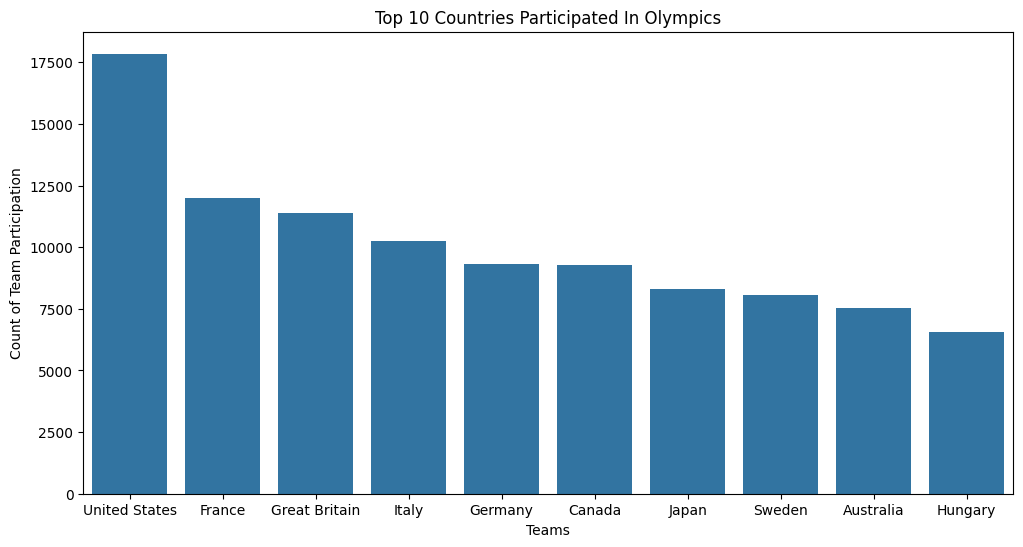

In [ ]:
# plot for top 10 countries
plt.figure(figsize=(12,6))
sns.barplot(x = top_10_countries.index,y = top_10_countries)
plt.xlabel('Teams')
plt.ylabel('Count of Team Participation')
plt.title('Top 10 Countries Participated In Olympics')
plt.show()

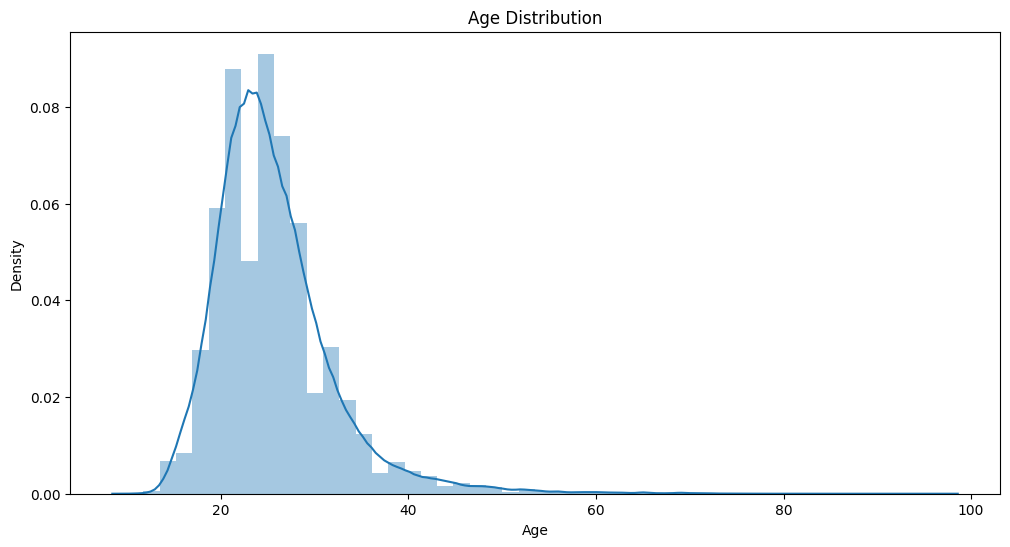

In [ ]:
# Age distribution of the participants
plt.figure(figsize=(12,6))
sns.distplot(df_merged.Age)
plt.xlabel('Age')
plt.title('Age Distribution')
plt.show()

In [ ]:
# winter olympic sports
winter_sports = df_merged[df_merged['Season'] == 'Winter'].Sport.unique()
winter_sports

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [ ]:
# summer olympic sports
summer_sports = df_merged[df_merged['Season'] == 'Summer'].Sport.unique()
summer_sports

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [ ]:
total_count = df_merged.groupby("Season")[["Team", "NOC", "Event", "City", "Sport"]].nunique().reset_index()
total_count

,Season,Team,NOC,Event,City,Sport
0,Summer,1157,230,651,23,52
1,Winter,221,119,119,19,17


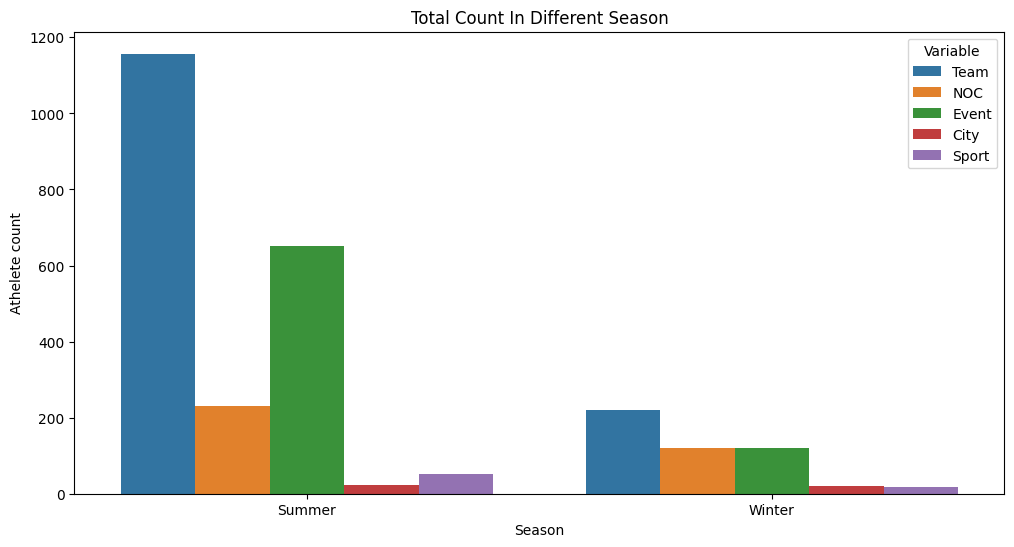

In [ ]:
tidy = total_count.melt(id_vars='Season').rename(columns=str.title)

plt.subplots(figsize=(12, 6))
sns.barplot(x='Season', y='Value', hue='Variable', data=tidy)
plt.title('Total Count In Different Season')
plt.ylabel("Athelete count")
plt.show()

In [ ]:
# male and female participants
gender_counts = df_merged.Sex.value_counts()
gender_counts

,count
Sex,
M,196594
F,74522


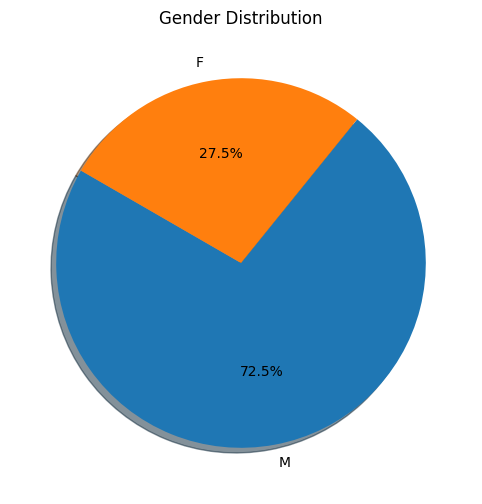

In [ ]:
# pie chart for male and female participants
plt.figure(figsize=(12,6))
plt.pie(gender_counts,labels = gender_counts.index, autopct = '%1.1f%%',startangle=150,shadow=True )
plt.title('Gender Distribution')
plt.show()

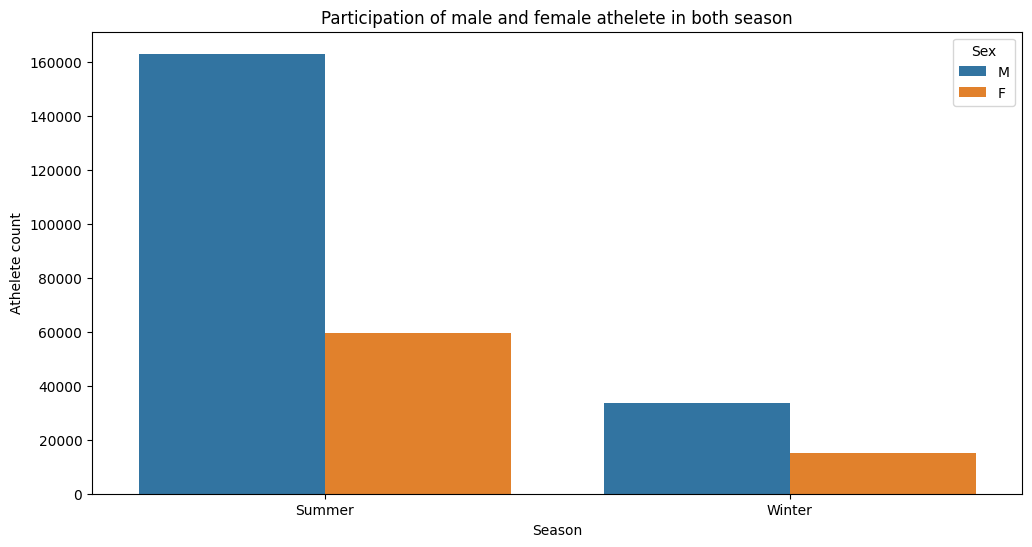

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x="Season", hue="Sex", data=df_merged)
plt.title('Participation of male and female athelete in both season')
plt.ylabel("Athelete count")
plt.show()

In [ ]:
# Total medals
df_merged.Medal.value_counts()

,count
Medal,
Gold,13372
Bronze,13295
Silver,13116


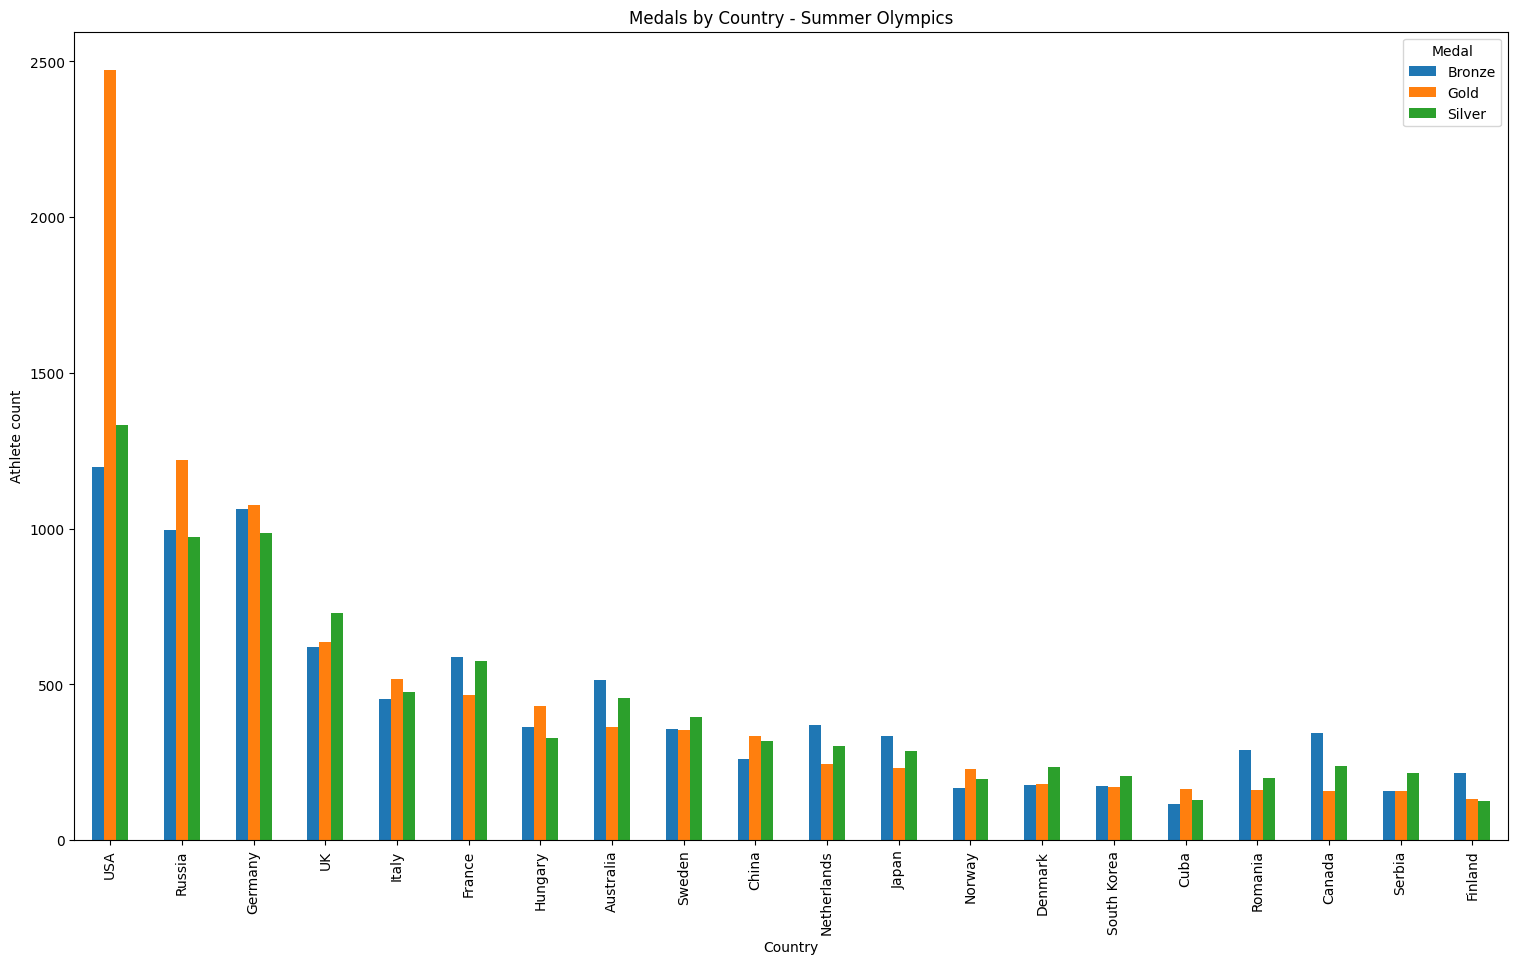

In [ ]:
import matplotlib.pyplot as plt

# Filtering Summer Olympics data and group by region and medal
total_medals_by_country = df_merged[df_merged['Season'] == 'Summer'] \
    .groupby(['region', 'Medal'])['Sex'].count().reset_index()

# Pivot to get medals as columns
total_medals_by_country = total_medals_by_country.pivot(
    index='region', columns='Medal', values='Sex'
).fillna(0)

# Ensureing all medal columns exist
for medal in ['Gold', 'Silver', 'Bronze']:
    if medal not in total_medals_by_country.columns:
        total_medals_by_country[medal] = 0

# Sort and select top 20 countries
total_medals_by_country = total_medals_by_country.sort_values(by='Gold', ascending=False).head(20)

# Plot
total_medals_by_country.plot(kind='bar')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel("Athlete count")
plt.title('Medals by Country - Summer Olympics')
plt.show()


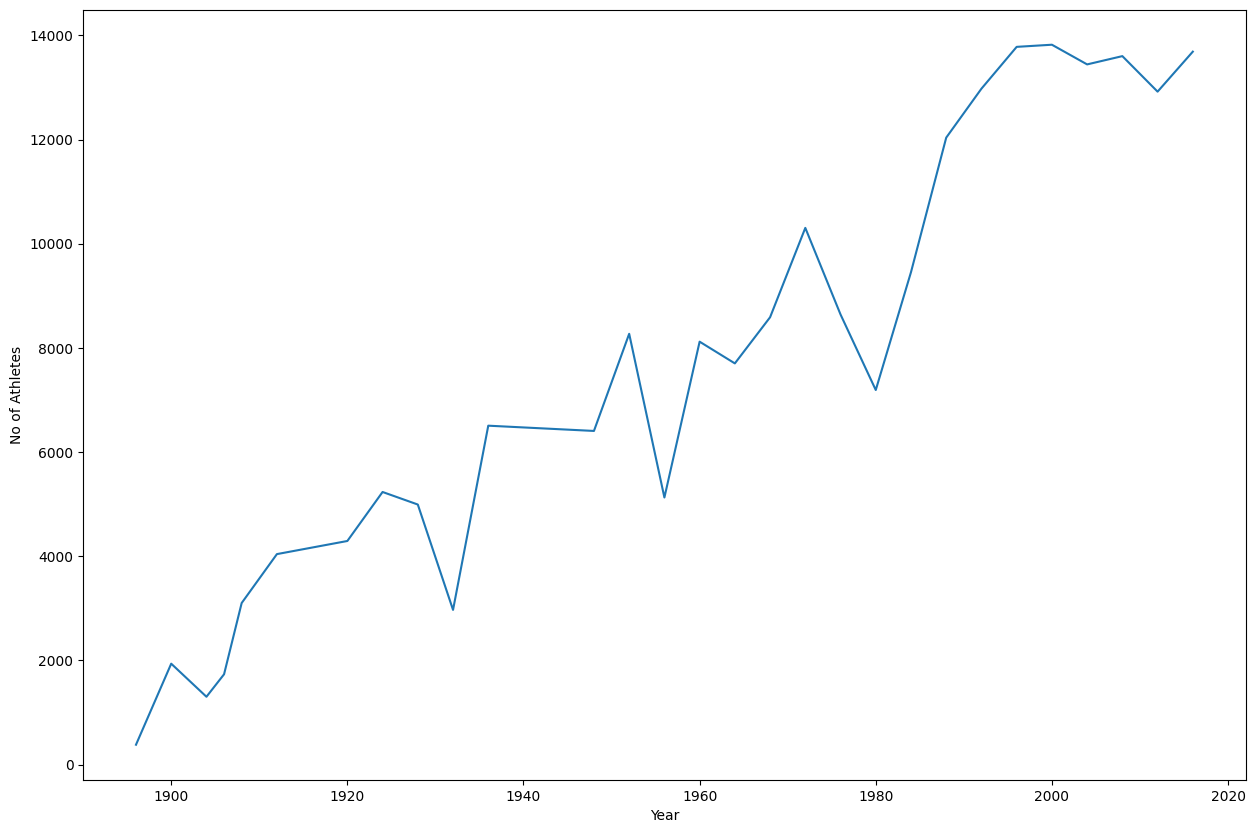

In [ ]:
# Atheletes Participated in Summer Olympics thru the years
athletes_per_year = df_merged[df_merged['Season']=='Summer'].groupby('Year')['ID'].count().reset_index()

plt.figure(figsize=(15, 10))
sns.lineplot(data=athletes_per_year, x="Year", y="ID")
plt.xlabel('Year')
plt.ylabel('No of Athletes')
plt.show()


In [ ]:
# total number of female athletes in summer olympics thru the years
female_participants = df_merged[(df_merged['Sex'] == 'F') & (df_merged['Season'] == 'Summer')][['Sex','Year']]
female_participants = female_participants.groupby('Year').count().reset_index()
female_participants.head()

,Year,Sex
0,1900,33
1,1904,16
2,1906,11
3,1908,47
4,1912,87


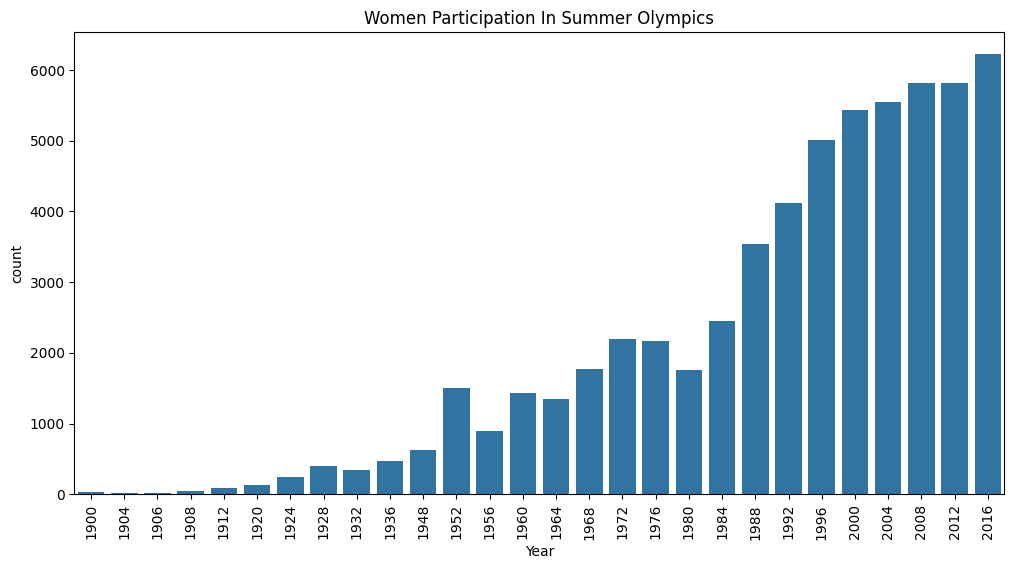

In [ ]:
# female athletes in summer olympics
women_olympics = df_merged[(df_merged['Sex'] == 'F') & (df_merged['Season'] == 'Summer')]

# count plot for women participation
plt.figure(figsize=(12,6))
sns.countplot(x='Year',data=women_olympics)
plt.title('Women Participation In Summer Olympics')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Gold medal athletes
goldMedals = df_merged[df_merged['Medal'] == 'Gold']
goldMedals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,City,Sport,Event,Medal,region,notes,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,...,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,NaN,NaN,NaN,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,...,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN,NaN,NaN,NaN,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,...,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN,NaN,NaN,NaN,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,...,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN,NaN,NaN,NaN,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,...,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN,NaN,NaN,NaN,NaN


In [ ]:
# gold medalist where age is not null
goldMedals = goldMedals[np.isfinite(goldMedals['Age'])]

In [ ]:
# Gold beyond 60
goldMedals[goldMedals['Age'] > 60]['ID'].count()

np.int64(6)

In [ ]:
# participation of gold medalist over 60 years in different sports
sporting_event = goldMedals[goldMedals['Age'] > 60]['Sport']
sporting_event

,Sport
104003,Art Competitions
105199,Roque
190952,Archery
226374,Archery
233390,Shooting
261102,Archery


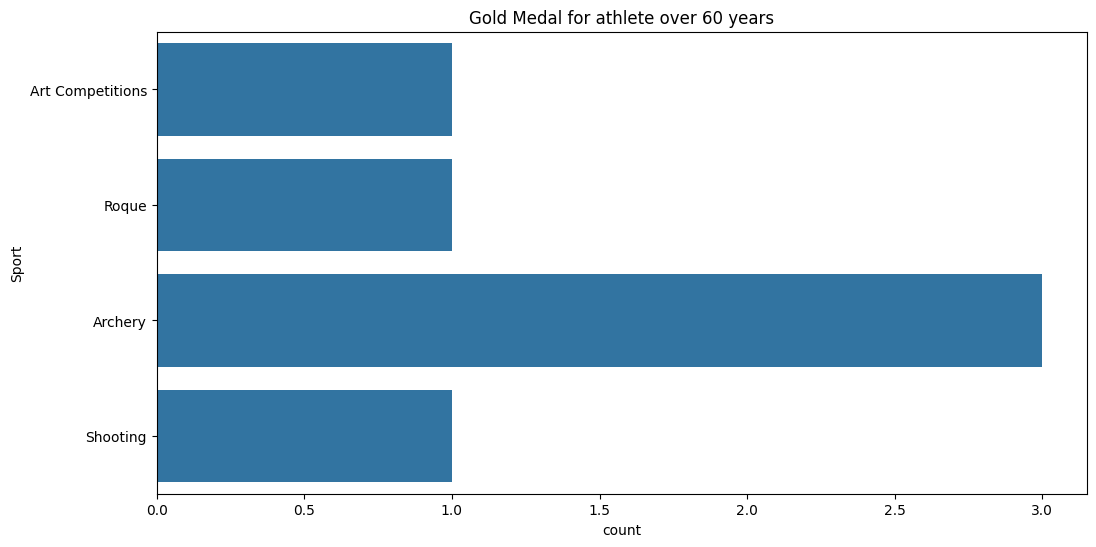

In [ ]:
# plot for sporting event

plt.figure(figsize=(12,6))
sns.countplot(sporting_event)
plt.title('Gold Medal for athlete over 60 years')
plt.show()

In [ ]:
# Gold medal for each country
goldMedals.region.value_counts().reset_index(name='Medal').head()

,region,Medal
0,USA,2627
1,Russia,1599
2,Germany,1293
3,UK,657
4,Italy,567


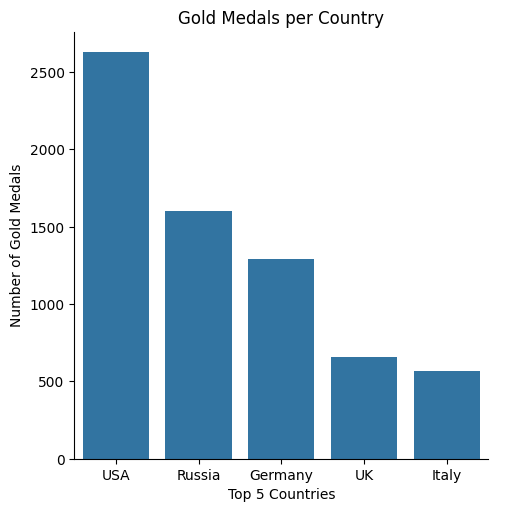

In [ ]:
# Count of gold medals by country
totalGoldMedals = goldMedals['region'].value_counts().reset_index()
totalGoldMedals.columns = ['Country', 'Medal']  # Rename columns
top5Gold = totalGoldMedals.head(5)

# Plot
sns.catplot(x='Country', y='Medal', data=top5Gold, kind='bar', height=5)
plt.xlabel('Top 5 Countries')
plt.ylabel('Number of Gold Medals')
plt.title('Gold Medals per Country')
plt.show()

In [ ]:
# gold medals for USA
goldMedals_USA = goldMedals.loc[goldMedals['NOC'] == 'USA']

In [ ]:
goldMedals_USA.Event.value_counts().reset_index(name='Medal').head(20)

,Event,Medal
0,Basketball Men's Basketball,186
1,Swimming Men's 4 x 200 metres Freestyle Relay,111
2,Swimming Men's 4 x 100 metres Medley Relay,108
3,Rowing Men's Coxed Eights,107
4,Basketball Women's Basketball,95
5,Athletics Men's 4 x 400 metres Relay,81
6,Swimming Women's 4 x 100 metres Medley Relay,79
7,Swimming Women's 4 x 100 metres Freestyle Relay,78
8,Football Women's Football,66
9,Athletics Men's 4 x 100 metres Relay,63


In [ ]:
# Rio Olympics
max_year = df_merged.Year.max()

df_Rio_teams = df_merged[(df_merged.Year == max_year) & (df_merged.Medal == 'Gold')]['Team']

df_Rio_teams.value_counts().head()

,count
Team,
United States,137
Great Britain,64
Russia,50
Germany,47
China,44


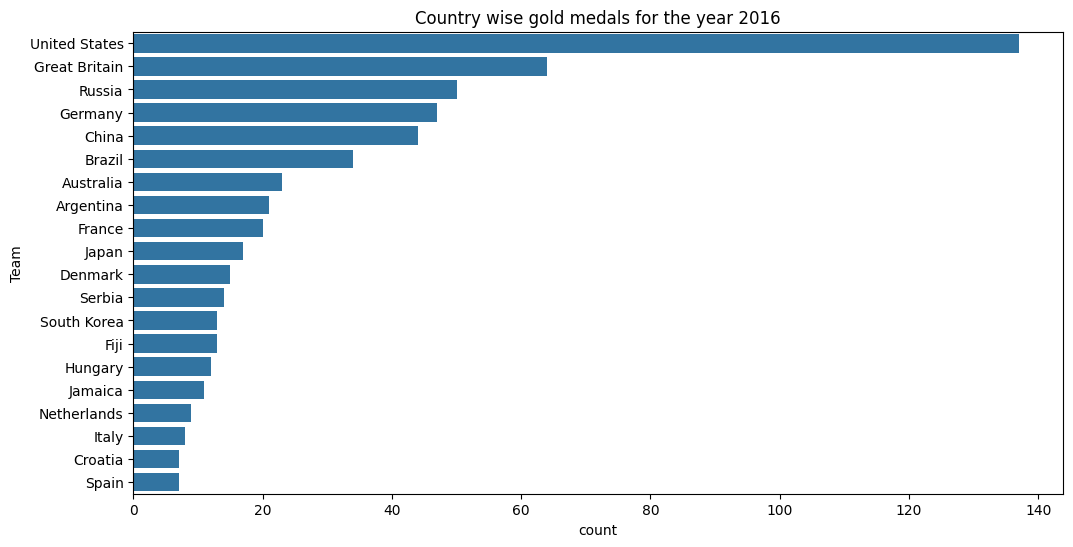

In [ ]:
# countplot for 2016 country wise gold medals
plt.figure(figsize=(12,6))
sns.barplot(x = df_Rio_teams.value_counts().head(20), y = df_Rio_teams.value_counts().head(20).index )
plt.title('Country wise gold medals for the year 2016')
plt.show()

In [ ]:
# looking at the relationship between height and weight
gold_medals_cleaned = goldMedals[(goldMedals['Height'].notnull()) & (goldMedals['Weight'].notnull())]

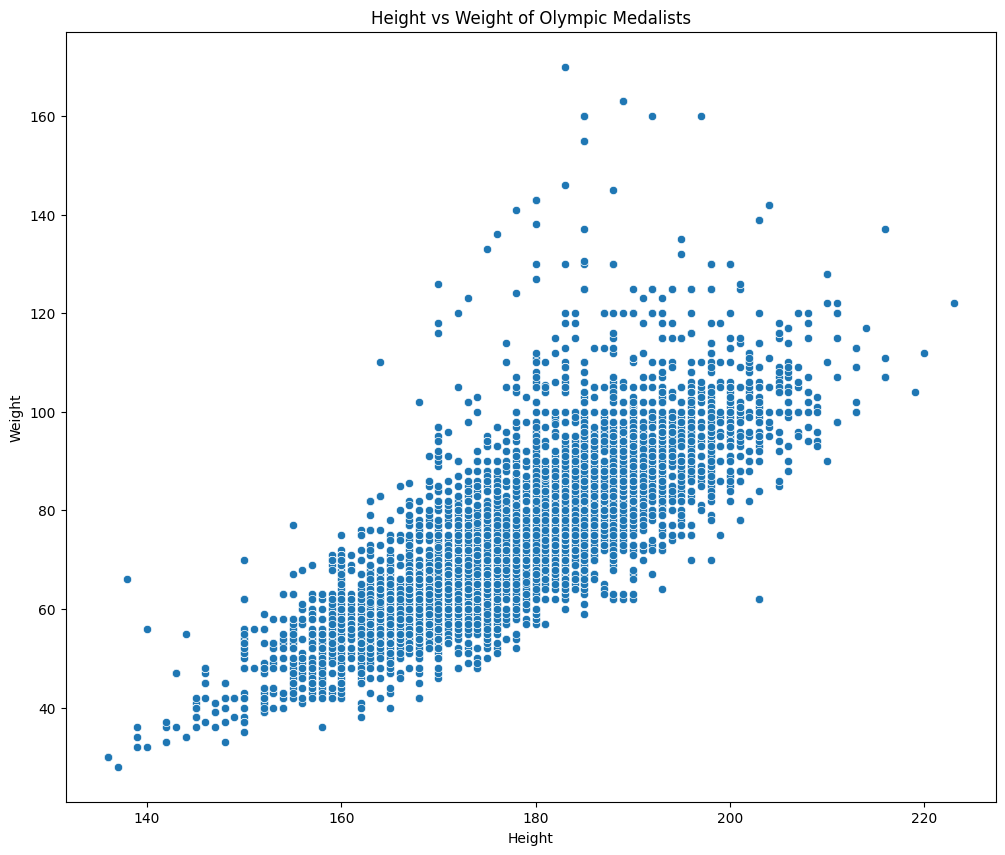

In [ ]:
plt.figure(figsize=(12, 10))
sns.scatterplot(x="Height", y="Weight", data=gold_medals_cleaned)
plt.title('Height vs Weight of Olympic Medalists')
plt.show()

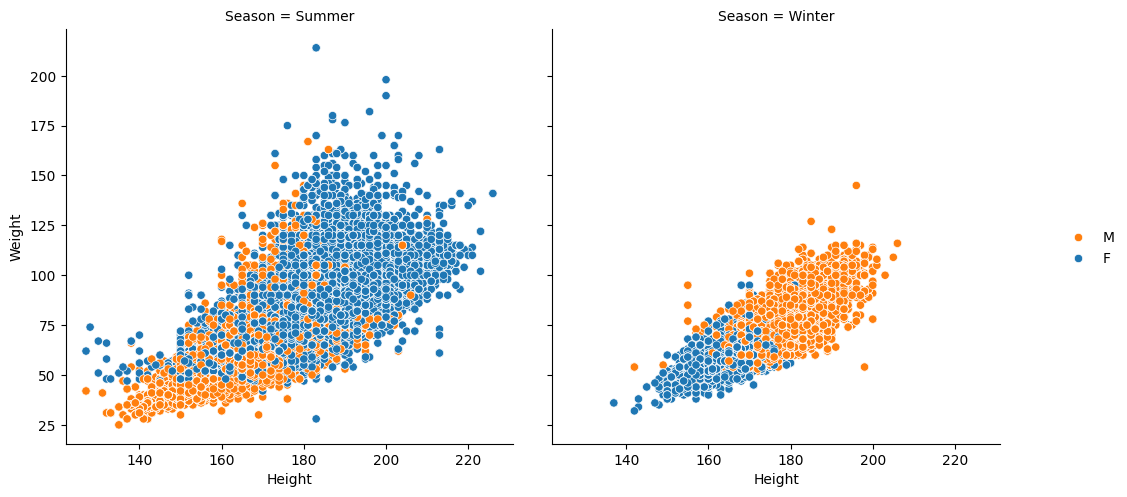

In [ ]:
merged_df_cleaned = df_merged[(df_merged['Height'].notnull()) & (df_merged['Weight'].notnull())]

g = sns.FacetGrid(merged_df_cleaned,col="Season")
g.map(sns.scatterplot, "Height", "Weight","Sex")
g.add_legend()
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()

In [ ]:
#Data Cleaning
df_merged.shape

(271116, 21)

In [ ]:
df_merged.isnull().sum()

,0
ID,0
Name,0
Sex,0
Age,9474
Height,60171
Weight,62875
Team,0
NOC,0
Games,0
Year,0


In [ ]:
# Dropping features which do not make any sense to predict medals
data = df_merged.copy()
data.drop(['ID','Name','Games','region','notes'],axis=1,inplace=True)

In [ ]:
# Binary Encoding for Medal
data['Medal'] = data['Medal'].apply(lambda x: 1 if str(x) != 'nan' else 0)

In [ ]:
data.head()

,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0,NaN,NaN,NaN,NaN
1,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0,NaN,NaN,NaN,NaN
2,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,0,NaN,NaN,NaN,NaN
3,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1,NaN,NaN,NaN,NaN
4,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0,NaN,NaN,NaN,NaN


In [ ]:
# Group by 'Medal' and 'Sex', then calculate the mean of numeric columns
grouped_data = data.groupby(['Medal', 'Sex']).mean(numeric_only=True)

# Display result
grouped_data


Age      Height     Weight         Year  Unnamed: 3  \
Medal Sex                                                              
0     F    23.594127  167.354499  59.434446  1992.488865         NaN   
      M    26.239318  178.473681  75.170519  1974.116253         NaN   
1     F    24.509167  170.474804  63.219378  1992.203324         NaN   
      M    26.497178  181.156113  79.203782  1966.741816         NaN   

           Unnamed: 4  Unnamed: 5  Unnamed: 6  
Medal Sex                                      
0     F           NaN         NaN         NaN  
      M           NaN         NaN         NaN  
1     F           NaN         NaN         NaN  
      M           NaN         NaN         NaN

In [ ]:
# creating list of categorical columns for one hot encoding
categorical_columns = [col for col in data.columns if data.dtypes[col] == 'object']

# creating list of numerical columns to standardized data
numerical_columns = [col for col in data.columns if ((data.dtypes[col] != 'object') & (col not in ['Medal','Year']))]

print('Numerical Features are : ',numerical_columns)
print('\n')
print('Categorical Features are : ',categorical_columns)


Numerical Features are :  ['Age', 'Height', 'Weight', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6']


Categorical Features are :  ['Sex', 'Team', 'NOC', 'Season', 'City', 'Sport', 'Event']


In [ ]:
# checking unique categories in categorical features for binary and onehot encoding

unique_categories = {col: len(data[col].unique()) for col in data.select_dtypes('object').columns}
unique_categories

{'Sex': 2,
 'Team': 1184,
 'NOC': 230,
 'Season': 2,
 'City': 42,
 'Sport': 66,
 'Event': 765}

In [ ]:
# one hot encoding function for categorical features
def onehot_encoder(data, cols):
    df = data.copy()
    for col in cols:
        dummies = pd.get_dummies(df[col],drop_first=True)
        # concatenating dummies and original dataframe
        df = pd.concat([df, dummies], axis=1)

        # dropping original coolumns for which encoding is applied.
        df.drop(col, axis=1,inplace=True)
    return df

In [ ]:
data = df_merged.copy()

# applying onehot encoding on features with more than 2 categories
data = onehot_encoder(
    data,
    cols=['Team', 'NOC', 'City', 'Sport', 'Event']
)

In [ ]:
# Binary encoding function for categorical features
def binary_encoder(data, columns, positive_values):
    df = data.copy()
    for col, positive_value in zip(columns, positive_values):
        df[col] = df[col].apply(lambda x: 1 if x == positive_value else 0)
    return df

In [ ]:
# applying Binary encoding on features with 2 categories
data = binary_encoder(
    data,
    columns=['Sex', 'Season'],
    positive_values=['M', 'Summer']
)

In [ ]:
# Split dataframe into dependent(y) and indepedent variables(X)
X = data.drop('Medal',axis=1)
y = data['Medal']

In [ ]:
X_train.select_dtypes(include='object').columns


Index(['Name', 'Games', 'region', 'notes'], dtype='object')

In [ ]:
X = df_merged.drop(['Medal', 'Name', 'ID'], axis=1)  # Drop non-numeric or unhelpful identifiers


In [ ]:
X = pd.get_dummies(X, drop_first=True)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Drop unneeded or non-numeric columns
X = df_merged.drop(['Medal', 'Name', 'ID'], axis=1)

# Encode categorical columns
X = pd.get_dummies(X, drop_first=True)

# Encode the target labels
le = LabelEncoder()
y = df_merged['Medal']
y_encoded = le.fit_transform(y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [ ]:
# Scaling Numerical Features

sc = StandardScaler()
X_train[numerical_columns] = sc.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = sc.transform(X_test[numerical_columns])

In [ ]:
# Using Random Forest classifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
# Predict
y_pred = rf.predict(X_test)

In [ ]:
print("Classification Report:\n\n", classification_report(y_test, y_pred))

Classification Report:

               precision    recall  f1-score   support

           0       0.89      0.49      0.63      2692
           1       0.85      0.62      0.71      2639
           2       0.86      0.51      0.64      2603
           3       0.93      0.99      0.96     46290

    accuracy                           0.93     54224
   macro avg       0.88      0.65      0.74     54224
weighted avg       0.92      0.93      0.92     54224



In [ ]:
#  Using Gradient boosting

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import HistGradientBoostingClassifier  # More memory efficient
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Load the data, limit to a smaller subset for testing
df = pd.read_csv('/content/athlete_events.csv', nrows=10000)  # Load 10,000 rows for testing
regions_df = pd.read_csv('/content/noc_regions.csv', delimiter=';', nrows=500)  # Load 500 rows for testing

# Merge dataframes
df_merged = df.merge(regions_df, on='NOC', how='left')

# Encode the target variable (Medal)
le = LabelEncoder()
df_merged['Medal'] = le.fit_transform(df_merged['Medal'])  # 0 = No medal, 1 = Bronze, 2 = Silver, 3 = Gold

# Split features and labels
X = df_merged.drop('Medal', axis=1)
y = df_merged['Medal']

# Label Encoding for categorical columns (instead of one-hot encoding)
categorical_columns = ['Sex', 'Sport', 'Team', 'NOC', 'Games', 'Year', 'Season', 'City', 'Country']  # Add your categorical columns here
le = LabelEncoder()

# Apply label encoding to categorical features
for col in categorical_columns:
    if col in X.columns:
        X[col] = le.fit_transform(X[col])

# Remove columns that are completely empty or with all missing values
X = X.dropna(axis=1, how='all')

# Remove non-numeric columns (e.g., names or any other non-numeric column that doesn't help the model)
X = X.select_dtypes(include=['float64', 'int64'])

# Handle missing values using SimpleImputer for numeric columns
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)  # Apply imputer to the entire dataset

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train HistGradientBoostingClassifier (memory efficient)
gb_model = HistGradientBoostingClassifier(max_iter=100, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred = gb_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8715

Classification Report:
               precision    recall  f1-score   support

           0       0.13      0.04      0.06        76
           1       0.34      0.13      0.19        86
           2       0.14      0.04      0.06        72
           3       0.90      0.98      0.94      1766

    accuracy                           0.87      2000
   macro avg       0.38      0.30      0.31      2000
weighted avg       0.82      0.87      0.84      2000


Confusion Matrix:
 [[   3    2    2   69]
 [   6   11    4   65]
 [   2    4    3   63]
 [  12   15   13 1726]]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load and clean data
df = pd.read_csv("Paris Olympics 2024.csv", delimiter=";")
df = df.drop(columns=["Unnamed: 0"])
df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)
df[['Gold', 'Silver', 'Bronze', 'Total']] = df[['Gold', 'Silver', 'Bronze', 'Total']].apply(pd.to_numeric)
df['Top_Performer'] = (df['Total'] >= 50).astype(int)

# Features and target
X = df[['Gold', 'Silver', 'Bronze']]
y = df['Top_Performer']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

# Logistic Regression model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)

# Evaluation
print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


=== Logistic Regression ===
Accuracy: 0.9454545454545454
Confusion Matrix:
 [[51  0]
 [ 3  1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        51
           1       1.00      0.25      0.40         4

    accuracy                           0.95        55
   macro avg       0.97      0.62      0.69        55
weighted avg       0.95      0.95      0.93        55



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load and clean data
df = pd.read_csv("Paris Olympics 2024.csv", delimiter=";")
df = df.drop(columns=["Unnamed: 0"])
df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)
df[['Gold', 'Silver', 'Bronze', 'Total']] = df[['Gold', 'Silver', 'Bronze', 'Total']].apply(pd.to_numeric)
df['Top_Performer'] = (df['Total'] >= 50).astype(int)

# Features and target
X = df[['Gold', 'Silver', 'Bronze']]
y = df['Top_Performer']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

# k-NN model (k=3)
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

# Evaluation
print("=== k-Nearest Neighbors (k=3) ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


=== k-Nearest Neighbors (k=3) ===
Accuracy: 0.9272727272727272
Confusion Matrix:
 [[51  0]
 [ 4  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96        51
           1       0.00      0.00      0.00         4

    accuracy                           0.93        55
   macro avg       0.46      0.50      0.48        55
weighted avg       0.86      0.93      0.89        55



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
